## COMP20008 - Elements of Data Processing Assignment 1
### By Leonardo Linardi, 855915 (March 2018)

In [1]:
# GENERAL CODES

# importing libraries
import pandas as pd
import matplotlib.pyplot as plt

# reads the 'New York City Yellow Taxi' January trips.
trips = pd.read_csv('clean-january.csv', encoding='ISO-8859-1')

# Helper Function
def printoutput(data, qnum):
    """ Prints a specific output, depending on the format of each question. """
    
    ast = '*'    # the character asterisk, '*'
    astnum = 3   # number of asterisks for a line break
    pctg= 100    # multiplier to convert decimals to percentage
    
    # determine the output format to be printed out according to each question
    if qnum in (1,3,5):
        # prints the output
        print("Question %d" % (qnum))
        if qnum == 1:
            print("%% of short trips=%.1f" % (data[0]*pctg))
        elif qnum == 3:
            print("%.1f%% of instances in 'tripdistance' are abnormal! (normal range is between 1.2 and 4.5)" % (data[0]*pctg))
        elif qnum == 5:
            print("%% of peak hour trips=%.1f" % (data[0]*pctg))
            
    elif qnum == 2:
        print("Question %d median trip %s" % (qnum, data[0]))
        print("January: %.1f" % (data[1]))
    
    # prints a line break with asterisks
    print("%s" % (ast*astnum))
    

In [4]:
# QUESTION 1 ANSWER

shortdist = 3.0   # the maximum distance for a trip to be classified as a 'short trip'
short = 1         # a trip is classified short
long = 0          # a trip is classified long
counter = 0       # counts the percentage of short trips

trips_dist = []   # to store short or long trips data

# determine whether each trip is classified as short or long
for dist in trips.trip_distance:
    if dist<shortdist:
        trips_dist.append(short)
        counter += 1
    else:
        trips_dist.append(long)
        
s_trips = pd.Series(trips_dist, index=trips.index)

# creates a new dataframe with the given schema order and short_trip data included
new_trips = pd.DataFrame({'Short_Trip':s_trips})
new_trips[['Trip_distance', 'Passenger_count', 'Payment_amount', 
           'Duration']] = trips[['trip_distance', 'passenger_count', 'payment_amount', 'duration']]

printoutput([len(s_trips[s_trips==short])/len(new_trips)], qnum = 1)

Question 1
% of short trips=71.3
***


In [3]:
# QUESTION 2 ANSWER

# finds and prints the median of trip distance and duration
printoutput(['distance', trips.trip_distance.median()], qnum = 2)
printoutput(['duration', trips.duration.median()], qnum = 2)

Question 2 median trip distance
January: 1.8
***
Question 2 median trip duration
January: 11.0
***


In [4]:
# QUESTION 3 ANSWER

lbound = 1.2    # lower bound for normal trip distance range
ubound = 4.5    # upper bound for normal trip distance range

# finds and prints the percentage of abnormal trips
abnormals = len([d for d in trips.trip_distance if not (lbound<=d<=ubound)])
printoutput([abnormals/len(trips)], qnum = 3)


Question 3
42.9% of instances in 'tripdistance' are abnormal! (normal range is between 1.2 and 4.5)
***


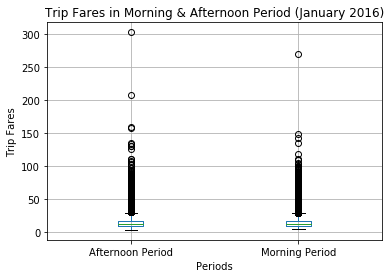

In [5]:
# QUESTION 4 ANSWER

mstart = 7    # starting hour of a morning period
mend = 11     # ending hour of a morning period
astart = 12   # starting hour of an afternoon period
aend = 15     # ending hour of an afternoon period
minute = 0    # specify minute of the ending hour

puptime = pd.to_datetime(trips['pickup_datetime'])

mperiod=[]    # to store morning period fares
aperiod=[]    # to store afternoon period fares

# finds which trip are in the morning/afternoon period
for i in range(len(trips)):
    # trips that starts in the morning period
    if (mstart <= puptime[i].hour <= mend):
        
        # exclude times that exceeds the ending hour (by its minute)
        if (puptime[i].hour == mend)&(puptime[i].minute > minute):
             pass
        # time in range, seperates that trip fare to a new list
        else:
            mperiod.append(trips['payment_amount'][i])
    
    # trips that starts in the afternoon period
    elif (astart <= puptime[i].hour <= aend):
        if (puptime[i].hour == aend)&(puptime[i].minute > minute):
             pass
        else:
            aperiod.append(trips['payment_amount'][i])
            
mperiod = pd.Series(mperiod)
aperiod = pd.Series(aperiod)
periods = pd.DataFrame({'Morning Period':mperiod, 'Afternoon Period':aperiod})

# Visualize the data with turkey boxplot
periods.plot(kind="box", grid=True)
plt.title("Trip Fares in Morning & Afternoon Period (January 2016)")
plt.xlabel("Periods")
plt.ylabel("Trip Fares")
plt.show()


In [6]:
# QUESTION 5 ANSWER

pstart = 7    # starting hour of a peak hour
pend = 9      # ending hour of a peak hour
ptrue = 1     # if a trip happens during peak hour
pfalse = 0    # if a trip doesn't happens during peak hour

stime = pd.to_datetime(trips['pickup_datetime'])
etime = pd.to_datetime(trips['dropoff_datetime'])

ptrips = []    # to store peak trips data

# determine which trip are in the peak hour
for i in range(len(trips)):
    # exclude trips that happens on weekend
    if (pstart <= stime[i].hour < pend)&(pstart <= etime[i].hour < pend)&(etime[i].weekday() not in (5,6)):
        ptrips.append(ptrue)
    else:
        ptrips.append(pfalse)

# adds a new column 'isPeak'
ptrips = pd.Series(ptrips)
trips['isPeak'] = ptrips

printoutput([len(ptrips[ptrips==ptrue])/len(ptrips)], 5)

Question 5
% of peak hour trips=6.1
***


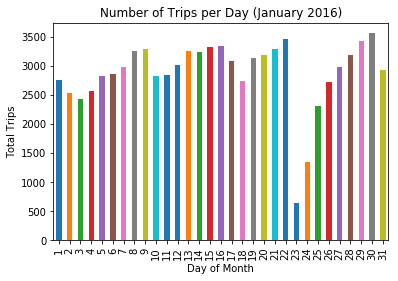

In [7]:
# QUESTION 6 ANSWER

stime = pd.to_datetime(trips['pickup_datetime'], format='%d/%m/%y %H:%M')

dayofmonth = []    # to store the day each trip began

# finds what day a trip began
for i in range(len(trips)):
    dayofmonth.append(stime[i].day)

dayofmonth = pd.Series(dayofmonth)

jan = 31            # number of days in the month January
jandays = []        # to store the days in the month January
tperday = []        # to store number of trips each day

# calculates the number of trips each day
for i in range(1,jan+1):
    jandays.append(i)
    tperday.append(len(dayofmonth[dayofmonth==i]))

# adds a new column 'dayofmonth'
trips['dayofmonth'] = dayofmonth
    
jandays = pd.Series(jandays)
tperday = pd.Series(tperday, index=jandays)

# Visualize the data with bar plot
tperday.plot(kind='bar')
plt.title("Number of Trips per Day (January 2016)")
plt.xlabel("Day of Month")
plt.ylabel("Total Trips")
plt.show()


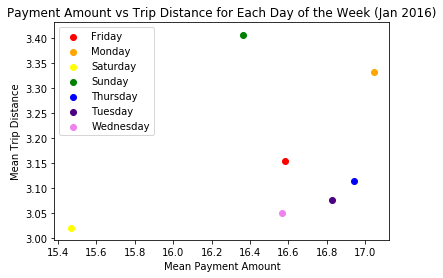

In [8]:
# QUESTION 7 ANSWER

stime = pd.to_datetime(trips['pickup_datetime'], format='%d/%m/%y %H:%M')

dayofweek = []    # to store what day of the week each trip began

# determines what day of the week a trip began
for i in range(len(trips)):
    dayofweek.append(stime[i].weekday_name)

# adds a new column 'dayofweek'
trips['dayofweek'] = pd.Series(dayofweek)

dist_mean = []    # to store the mean distance per day of week
pay_mean = []     # to store the mean payment amount per day of week
days = []         # to store days of a week (Monday, Tuesday, ...) 

# groups the trips based on their day of week
groupday = trips.groupby('dayofweek')

# finds the mean trip distance and payment amount of each day of week
for k, group in groupday:
    dist_mean.append(group.trip_distance.mean())
    pay_mean.append(group.payment_amount.mean())
    days.append(k)

means = pd.DataFrame({'Mean_Trip_Distance': pd.Series(dist_mean), 
                      'Mean_Payment_Amount': pd.Series(pay_mean)})
means.index = days

# Assign colours to each day of the week
colours = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet']

# Visualize the data with a scatter plot
for i, col in enumerate(colours):
    plt.scatter(means.Mean_Payment_Amount[i], 
                means.Mean_Trip_Distance[i], c=colours[i], label=means.index[i])
plt.title('Payment Amount vs Trip Distance for Each Day of the Week (Jan 2016)')
plt.xlabel('Mean Payment Amount')
plt.ylabel('Mean Trip Distance')
plt.legend()
plt.show()


Text(0.5,1,'Mean Trip Distance, Passenger Count and Payment Amount of Weekday & Weekend (Jan 2016)')

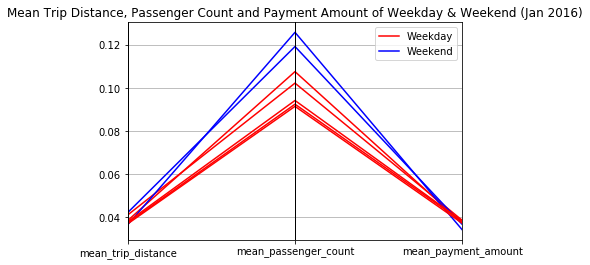

In [9]:
# QUESTION 8 ANSWER
from pandas.plotting import parallel_coordinates

# Helper Funtion
def normalise(oldval, min, max):
    """ Normalise a value of a feature, which takes an list/series of 
    'oldval' (the old, un-normalised data), the 'minimum' and the 
    'maximum' value of that feature. Returns a list of 'newval' 
    (the new, normalised data) through the formula: 
    newvalue = (oldvalue-min)/(max-min)"""
    
    newval = []
    for i in range(len(oldval)):
        newval.append((oldval[i]-min)/(max-min))
    return newval

# Normalise the datas and stores them in a list
[tripd, passc, paya] = [trips['trip_distance'], 
                        trips['passenger_count'], trips['payment_amount']]
trips['n_tripd'] = normalise(tripd, tripd.min(), tripd.max()) 
trips['n_passc'] = normalise(passc, passc.min(), passc.max()) 
trips['n_paya'] = normalise(paya, paya.min(), paya.max())

# to store the mean of the normalised data based on each day of week
nm_tripd = []
nm_passc = []
nm_paya = []

# groups the trips based on their day of week
groupday = trips.groupby('dayofweek')

week_dayend = []    # to store days of a week (Monday, Tuesday, ...) 

# finds the mean values of each day of week
for k, group in groupday:
    nm_tripd.append(group.n_tripd.mean())
    nm_passc.append(group.n_passc.mean())
    nm_paya.append(group.n_paya.mean())
    if k in ('Saturday', 'Sunday'):
        week_dayend.append('Weekend')
    else:
        week_dayend.append('Weekday')

p_coor = pd.DataFrame({'mean_trip_distance': nm_tripd, 'mean_passenger_count': nm_passc, 
                       'mean_payment_amount': nm_paya, 'weekday': week_dayend})

# Visualize the data with parallel coordinates
parallel_coordinates(p_coor[['weekday', 'mean_trip_distance', 
                             'mean_passenger_count', 'mean_payment_amount']], 
                     'weekday', color=['r','b'])
plt.title('Mean Trip Distance, Passenger Count and Payment Amount of Weekday & Weekend (Jan 2016)')




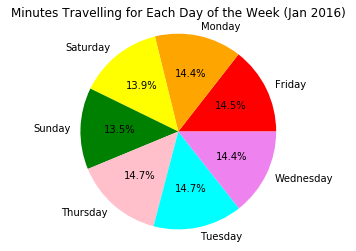

In [10]:
# QUESTION 9 ANSWER

trips['minutes_travelling'] = trips['passenger_count']*trips['duration']

min_trav = []  # to store the mean minutes travelling per day of the week
days = []      # to store days of a week (Monday, Tuesday, ...)

# groups the trips based on their day of week
groupday = trips.groupby('dayofweek')

# finds the mean minutes travelling of each day of week
for k, group in groupday:
    min_trav.append(group.minutes_travelling.mean())
    days.append(k)
    
# Assign colours to each day of the week
colours = ['red', 'orange', 'yellow', 'green', 'pink', 'cyan', 'violet']  

# Visualize the data with pie chart
plt.pie(min_trav, explode=None, labels=days, colors=colours, autopct='%.1f%%')
plt.title('Minutes Travelling for Each Day of the Week (Jan 2016)')
plt.axis('equal')
plt.show()

In [ ]:
# QUESTION 10 ANSWER

from datetime import timedelta

stime = pd.to_datetime(trips['pickup_datetime'], format='%d/%m/%y %H:%M')
etime = pd.to_datetime(trips['dropoff_datetime'], format='%d/%m/%y %H:%M')

period = timedelta(hours=1) # the 60 minute period range
maxtrips60 = []     # to store the max number of trips per each day of month
numtrips60 = []     # to store the number of trips occuring within 60 min periods
daysofmonth = []    # to store days of a month
daytype = []        # to store the type of each day (Weekday or Weekend)
colours = []        # to store the colour associated with each day type, for visualization

# initialise some variables to keep track of the trips iterated
firsttrip=1
skiptrip=0
prevtime = stime[0]
prevday = stime[0].day
tcount=0

# iterate through the whole pickup time data, finding max num of trips
for i in range(len(stime)):
    
    currtime = stime[i]
    currday = stime[i].day  
    
    # if the trips no longer occurs in the same day, a new day is found
    if (prevday != currday):
        # finds the max number of trips occuring in 60 min periods
        maxtrips60.append(max(numtrips60))
        
        # store values to visualize the data
        daysofmonth.append(prevday)
        if prevtime.weekday() in (5,6):
            colours.append('blue')
            daytype.append('Weekend')
        else:
            colours.append('red')
            daytype.append('Weekday')
            
        # reinitialise the variables
        numtrips60[:] = []
        tcount=0
        # 'previous' trip tracker catches up with the 'current' trip tracker
        prevtime=currtime
        prevday=currday
    
    # skips trips that have the exact same pick up time (same hour same minute)
    if (prevtime.time == currtime.time):
        skiptrip=1

    if ((not skiptrip) | (firsttrip)):
        # searches for other trips that occurs in the 60 min period range
        for j in range(i, len(stime)):
         
            # a trip falls in the 60 min period range
            if (currtime<=stime[j]<=(currtime+period))&(currtime<=etime[j]<=(currtime+period)):
                if (etime[j].day == currday):
                    tcount+=1
            # the trip already surpasses the 60 min period range
            elif (stime[j]>(currtime+period)):
                break
                
        # if there are no other trips in the 60 min period range
        if (tcount not in (0,1)):
            # '-1' to exclude the current trip itself
            numtrips60.append(tcount-1)
    
    # reinitialise the variables
    tcount=0
    skiptrip=0
    firsttrip=0

# adds the last day's max number of trips
maxtrips60.append(max(numtrips60))
# store the last day's values to visualize the data
daysofmonth.append(currday)
if currtime.weekday() in (5,6):
    colours.append('blue')
    daytype.append('Weekend')
else:
    colours.append('red')
    daytype.append('Weekday')

# Visualize the data with a scatter plot
for i in range(len(maxtrips60)):
    plt.scatter(daysofmonth[i], maxtrips60[i], c=colours[i], label=daytype[i])
    
plt.title('Max number of trips occuring in 60 min period per each day of month, categorized by the day type (Jan 2016)')
plt.xlabel('Day of Month')
plt.ylabel('max_trips_60min_day')
plt.legend(['Weekday', 'Weekend'])
plt.show()

